In [4]:
results_name = 'ApplesOptions'

In [7]:
import sys; sys.path.append('../..')

from src.results import read_results
import datetime

orders = list(read_results.get_orders(results_name))


from src.risk import simulate_account

simulation_parameters = simulate_account.build_td_simulation()
pp_by_day = list(simulate_account.yield_last_by_date(simulate_account.yield_running_purchasing_power_with_settling(iter(orders), simulation_parameters)))
pp_by_day = [(pp_by_day[0][0] - datetime.timedelta(days=1), 0.)] + pp_by_day

for day, pp in pp_by_day:
    print(day, pp)

2022-01-02 0.0
2022-01-03 -123.75
2022-01-04 -352.0
2022-01-05 -344.25
2022-01-06 -222.74999999999997
2022-01-07 -448.0
2022-01-10 -521.0
2022-01-11 -390.0
2022-01-12 -326.0
2022-01-13 -395.0
2022-01-14 -401.0
2022-01-18 -200.0
2022-01-19 -638.0
2022-01-20 -535.0
2022-01-21 -497.00000000000006
2022-01-24 -693.0000000000001
2022-01-25 -279.00000000000017
2022-01-26 103.74999999999989
2022-01-27 -123.75000000000011
2022-01-28 -287.0000000000001
2022-01-31 333.9999999999999
2022-02-01 467.9999999999999
2022-02-02 614.7499999999999
2022-02-03 606.2499999999999
2022-02-04 312.9999999999999
2022-02-07 324.9999999999999
2022-02-08 306.9999999999999
2022-02-09 289.9999999999999
2022-02-10 492.7499999999999
2022-02-11 115.49999999999989
2022-02-14 37.499999999999886
2022-02-15 258.4999999999999
2022-02-16 421.2499999999999
2022-02-17 362.7499999999999
2022-02-18 184.4999999999999
2022-02-22 191.4999999999999
2022-02-23 201.2499999999999
2022-02-24 295.7499999999999
2022-02-25 356.2499999999999


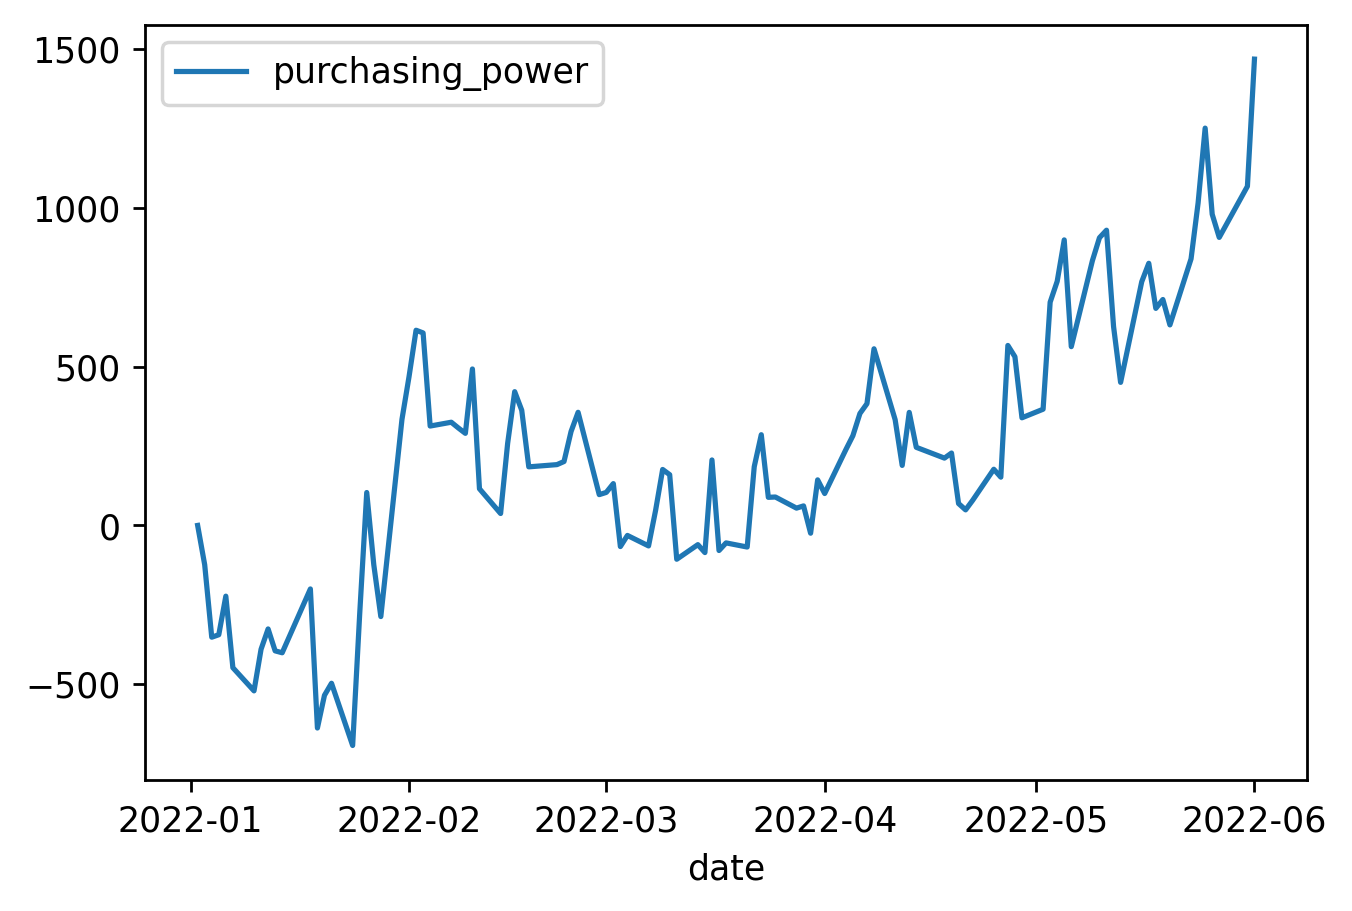

In [8]:
import pandas as pd
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 250


pd.DataFrame(pp_by_day, columns=['date', 'purchasing_power']).set_index('date').plot()